## Creating the Frailty Index
#### By Gavin Qu, July 10th 2024

### Data Extraction
- Reads each wave's data from its respective file
- Extracts only the specified variables for each wave
- Adds a 'wave' column to identify the source wave for each row
- Combines all waves' data into a single DataFrame

In [1]:
import os
import pandas as pd

# Set directory
data_dir = '/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls'
output_dir = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data'

# Base list of relevant variables (without wave prefix)
base_variables = [
    'pidp',
    'age_dv',
    'disdif1', 'disdif2', 'disdif3', 'disdif4', 'disdif5', 'disdif6', 'disdif7', 'disdif8',
    'disdif9', 'disdif10', 'disdif11',
    'hcond1', 'hcond2', 'hcond3', 'hcond4', 'hcond5', 'hcond6', 'hcond7', 'hcond8', 
    'hcond9', 'hcond10', 'hcond11', 'hcond12', 'hcond13', 'hcond14', 'hcond15', 'hcond16', 
    'hcondn1', 'hcondn2', 'hcondn3', 'hcondn4', 'hcondn5', 'hcondn6', 'hcondn7', 'hcondn8', 
    'hcondn9', 'hcondn10', 'hcondn11', 'hcondn12', 'hcondn13', 'hcondn14', 'hcondn15', 'hcondn16', 
    'hcondever1', 'hcondever2', 'hcondever3', 'hcondever4', 'hcondever5', 'hcondever6', 'hcondever7', 'hcondever8', 
    'hcondever9', 'hcondever10', 'hcondever11', 'hcondever12', 'hcondever13', 'hcondever14', 'hcondever15', 'hcondever16', 
    'hcondnew1', 'hcondnew2', 'hcondnew3', 'hcondnew4', 'hcondnew5', 'hcondnew6', 'hcondnew7', 'hcondnew8', 
    'hcondnew9', 'hcondnew10', 'hcondnew11', 'hcondnew12', 'hcondnew13', 'hcondnew14', 'hcondnew15', 'hcondnew16', 
]

# Initialize an empty list to store DataFrames variables 
df_list = []

# Process each wave
for wave in 'abcdefghijklm':
    file_path = os.path.join(data_dir, f'{wave}_indresp.dta')
    
    # Read the .dta file to get available columns
    with pd.read_stata(file_path, iterator=True) as stata_file:
        available_columns = stata_file.variable_labels().keys()
    
    # Create a list of variables that exist in this wave's data
    wave_vars = ['pidp'] + [f'{wave}_{var}' for var in base_variables[1:] if f'{wave}_{var}' in available_columns]
    
    # Read only the available columns
    df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)
    df_wave['wave'] = wave
    
    # Remove wave prefix from column names
    df_wave.columns = ['pidp' if col == 'pidp' else col[2:] if col.startswith(f'{wave}_') else col for col in df_wave.columns]
    
    df_list.append(df_wave)
    print(f"Processed wave {wave}, extracted {len(wave_vars)} variables")

# Combine all DataFrames
df_combined = pd.concat(df_list, ignore_index=True)

# Save to CSV
output_path = os.path.join(output_dir, 'ukhls_extracted.csv')
df_combined.to_csv(output_path, index=False)

print(f"Extracted data saved to {output_path}")
print(f"Total rows: {len(df_combined)}")
print(f"Total columns: {len(df_combined.columns)}")

Processed wave a, extracted 29 variables
Processed wave b, extracted 29 variables


/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/1236701905.py:33: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  available_columns = stata_file.variable_labels().keys()
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/1236701905.py:39: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)


Processed wave c, extracted 45 variables
Processed wave d, extracted 45 variables


/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/1236701905.py:33: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  available_columns = stata_file.variable_labels().keys()
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/1236701905.py:39: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)


Processed wave e, extracted 45 variables
Processed wave f, extracted 45 variables
Processed wave g, extracted 45 variables
Processed wave h, extracted 45 variables
Processed wave i, extracted 45 variables
Processed wave j, extracted 43 variables
Processed wave k, extracted 43 variables
Processed wave l, extracted 43 variables
Processed wave m, extracted 43 variables
Extracted data saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_extracted.csv
Total rows: 533476
Total columns: 76


### Sort dataframe by pidp and wave
**The resulting csv file from the previous step does not organize the 'pidp' correctly and next to each other, so the following script with reorganize it into a easier to work with long panel with the same 'pidp' all below each other.**

In [2]:
import pandas as pd
import os

# Set input and output directories
input_dir = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data'
output_dir = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data'

# Read the input CSV file
input_file = os.path.join(input_dir, 'ukhls_extracted.csv')
df = pd.read_csv(input_file)

# Sort the dataframe by 'pidp' and 'wave'
df_sorted = df.sort_values(['pidp', 'wave'])

# Reset the index
df_sorted = df_sorted.reset_index(drop=True)

# Save the sorted dataframe to a new CSV file
output_file = os.path.join(output_dir, 'ukhls_long_panel_format.csv')
df_sorted.to_csv(output_file, index=False)

print(f"Long panel format data saved to {output_file}")
print(f"Total rows: {len(df_sorted)}")
print(f"Total columns: {len(df_sorted.columns)}")

Long panel format data saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_long_panel_format.csv
Total rows: 533476
Total columns: 76


### Data Wrangling and New Variable Construction
#### Creating the 'healthcond' variable

1. For wave 'a', it only considers hcond.
2. It skips wave 'b' for hcond.
3. For waves 'c' through 'i' (waves 2-9), it considers both hcond (for new participants) and hcondn (for existing participants).
4. For wave 'j' (wave 10), it uses hcond and hcondever.
5. For waves 'k', 'l', and 'm' (waves 11-13), it uses hcond and hcondnew.
6. It converts all negative values to NaN.
7. After processing each wave, it forward-fills the health condition status for each individual.

In [61]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_long_panel_format.csv')

# Convert all negative values to NaN
df = df.apply(lambda x: x.where(x >= 0, np.nan) if x.dtype.kind in 'biufc' else x)

# Define waves
waves = 'abcdefghijklm'

def create_health_condition_columns(df):
    for i in range(1, 17):
        condition_col = f'healthcond{i}'
        df[condition_col] = np.nan
        
        hcond_col = f'hcond{i}'
        hcondn_col = f'hcondn{i}'
        hcondever_col = f'hcondever{i}'
        hcondnew_col = f'hcondnew{i}'
        
        # Initialize the condition column
        df[condition_col] = 0
        
        for wave in waves:
            wave_mask = df['wave'] == wave
            
            if wave == 'a':
                if hcond_col in df.columns:
                    df.loc[wave_mask & (df[hcond_col] == 1), condition_col] = 1
                    df.loc[wave_mask & (df[hcond_col].isna()), condition_col] = np.nan
            elif wave == 'b':  # Wave 2
                if hcondn_col in df.columns:
                    df.loc[wave_mask & (df[hcondn_col] == 1), condition_col] = 1
                    df.loc[wave_mask & (df[hcondn_col].isna()) & (df[condition_col] != 1), condition_col] = np.nan
            elif wave in 'cdefghi':  # Waves 3-9
                if hcond_col in df.columns and hcondn_col in df.columns:
                    df.loc[wave_mask & ((df[hcond_col] == 1) | (df[hcondn_col] == 1)), condition_col] = 1
                    df.loc[wave_mask & (df[hcondn_col].isna()) & (df[hcond_col].isna()) & (df[condition_col] != 1), condition_col] = np.nan
            elif wave == 'j':  # Wave 10
                if hcond_col in df.columns and hcondever_col in df.columns:
                    df.loc[wave_mask & ((df[hcond_col] == 1) | (df[hcondever_col] == 1)), condition_col] = 1
                    df.loc[wave_mask & (df[hcondever_col].isna()) & (df[hcond_col].isna()) & (df[condition_col] != 1), condition_col] = np.nan
            elif wave in 'klm':  # Waves 11-13
                if hcond_col in df.columns and hcondnew_col in df.columns:
                    df.loc[wave_mask & ((df[hcond_col] == 1) | (df[hcondnew_col] == 1)), condition_col] = 1
                    df.loc[wave_mask & (df[hcondnew_col].isna()) & (df[hcond_col].isna()) & (df[condition_col] != 1), condition_col] = np.nan
        
        # Forward fill the condition
        df[condition_col] = df.groupby('pidp')[condition_col].transform(lambda x: x.fillna(method='ffill'))
        
        # Ensure that 1s are not overwritten
        df[condition_col] = df.groupby('pidp')[condition_col].transform(lambda x: x.where(x != 1, 1))
        
        # Set to NaN if all previous values were NaN
        df[condition_col] = df.groupby('pidp')[condition_col].transform(
            lambda x: x.where(x.notna().cumsum() > 0, np.nan)
        )
    
    return df

# Apply the function to create health condition columns
df = create_health_condition_columns(df)

# Sort the dataframe by pidp and wave
df = df.sort_values(['pidp', 'wave'])

# Save the updated dataset
output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel.csv'
df.to_csv(output_path, index=False)

print(f"Updated dataset saved to {output_path}")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/3273271964.py:51: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[condition_col] = df.groupby('pidp')[condition_col].transform(lambda x: x.fillna(method='ffill'))
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/3273271964.py:51: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[condition_col] = df.groupby('pidp')[condition_col].transform(lambda x: x.fillna(method='ffill'))
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/3273271964.py:51: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[condition_col] = df.groupby('pidp')[condition_col].transform(lambda x: x.fillna(method='ffill'))
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn

Updated dataset saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel.csv
Total rows: 533476
Total columns: 92


#### The following code reorganizes the death dataset into a long panel format

In [47]:
import pandas as pd
import numpy as np

# Load the death dataset from .dta file
death_df = pd.read_stata('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/xwavedat.dta')

# Define waves
waves = 'abcdefghijklm'

# Function to extract wave number from dcsedw_dv
def extract_wave(value):
    if isinstance(value, str) and value.startswith("UKHLS Wave"):
        wave_num = int(value.split()[-1]) - 18  # Subtract 18 to get UKHLS wave number
        if 2 <= wave_num <= 13:
            return waves[wave_num - 1]  # Convert to corresponding letter
    return None

# Process death information
death_df['wave'] = death_df['dcsedw_dv'].apply(extract_wave)
death_df['death'] = 1

# Remove rows where wave is None (no death recorded in UKHLS waves 2-13)
death_df = death_df.dropna(subset=['wave'])

# Select only necessary columns
death_df_long = death_df[['pidp', 'wave', 'death']]

# Sort by pidp and wave
death_df_long = death_df_long.sort_values(['pidp', 'wave'])

# Reset index
death_df_long = death_df_long.reset_index(drop=True)

# Save the long format death dataset
output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/death_data_long_panel.csv'
death_df_long.to_csv(output_path, index=False)

print(f"Long panel death data saved to {output_path}")
print(f"Total rows: {len(death_df_long)}")
print(f"Unique pidps: {death_df_long['pidp'].nunique()}")
print("\nSample of the data:")
print(death_df_long.head(10))

# Additional check for multiple death records
multiple_deaths = death_df_long.groupby('pidp').size().sort_values(ascending=False)
if (multiple_deaths > 1).any():
    print("\nWarning: Some pidps have multiple death records:")
    print(multiple_deaths[multiple_deaths > 1].head())
else:
    print("\nNo pidps with multiple death records found.")

# Distribution of deaths by wave
print("\nDistribution of deaths by wave:")
print(death_df_long['wave'].value_counts().sort_index())

Long panel death data saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/death_data_long_panel.csv
Total rows: 4444
Unique pidps: 4444

Sample of the data:
       pidp wave  death
0   3490445    l      1
1  68006807    j      1
2  68014287    l      1
3  68020407    l      1
4  68025847    j      1
5  68034007    c      1
6  68044891    e      1
7  68048287    j      1
8  68048291    c      1
9  68060525    m      1

No pidps with multiple death records found.

Distribution of deaths by wave:
wave
b    276
c    381
d    457
e    347
f    351
g    433
h    432
i    378
j    366
k    346
l    337
m    340
Name: count, dtype: int64


/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/2893861321.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multiple_deaths = death_df_long.groupby('pidp').size().sort_values(ascending=False)


## Construction of the Frailty Index

We also assigned a frailty of 1 if that person has died, using a previously extracted dataframe with death and wave data. 

In [59]:
import pandas as pd
import numpy as np

# Load datasets
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel.csv')
death_df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/death_data_long_panel.csv')

# Define output path
output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_with_frailty_long_panel.csv'

# Define waves and create wave_order
waves = 'abcdefghijklm'
wave_order = {wave: i for i, wave in enumerate(waves)}
df['wave_order'] = df['wave'].map(wave_order)
death_df['wave_order'] = death_df['wave'].map(wave_order)

# Calculate frailty wave by wave
health_cols = [f'healthcond{i}' for i in range(1, 17)] + [f'disdif{i}' for i in range(1, 12)]

def calculate_frailty(row):
    valid_conditions = row[health_cols].notna()
    return row[health_cols].sum() / valid_conditions.sum() if valid_conditions.sum() > 0 else np.nan

df['frailty'] = df.apply(calculate_frailty, axis=1)

# Sort the dataframe
df = df.sort_values(['pidp', 'wave_order'])

# Process death information
df = df.merge(death_df[['pidp', 'wave', 'death']], on=['pidp', 'wave'], how='left')

# Forward fill the death indicator within each pidp group
df['death'] = df.groupby('pidp')['death'].fillna(method='ffill')

# Set frailty to 1 for individuals from their death wave onwards, only if it's not already 1
df.loc[(df['death'] == 1) & (df['frailty'] < 1), 'frailty'] = 1.0

# Drop temporary columns
df = df.drop(['death', 'wave_order'], axis=1)

# Save the result
df.to_csv(output_path, index=False)

print(f"\nData with frailty measures saved to {output_path}")

# Print summary statistics
print("\nFrailty Summary:")
print(df['frailty'].describe())

print("\nFrailty distribution:")
print(df['frailty'].value_counts(normalize=True).sort_index())

# Check for any pidps in death_df not in main df
missing_pidps = set(death_df['pidp']) - set(df['pidp'])
if missing_pidps:
    print(f"\nNumber of pidps in death dataset not found in main dataset: {len(missing_pidps)}")
    print("Sample of missing pidps:", list(missing_pidps)[:5])
else:
    print("\nAll pidps from death dataset are present in main dataset.")

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/1579355509.py:33: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['death'] = df.groupby('pidp')['death'].fillna(method='ffill')
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/1579355509.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['death'] = df.groupby('pidp')['death'].fillna(method='ffill')



Data with frailty measures saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_with_frailty_long_panel.csv

Frailty Summary:
count    533476.000000
mean          0.028630
std           0.059456
min           0.000000
25%           0.000000
50%           0.000000
75%           0.037037
max           0.703704
Name: frailty, dtype: float64

Frailty distribution:
frailty
0.000000    0.701848
0.037037    0.102798
0.062500    0.029548
0.074074    0.057530
0.111111    0.035930
0.125000    0.004206
0.148148    0.023572
0.185185    0.015849
0.187500    0.000860
0.222222    0.010951
0.250000    0.000182
0.259259    0.006956
0.296296    0.004285
0.312500    0.000037
0.333333    0.002416
0.370370    0.001449
0.375000    0.000004
0.407407    0.000784
0.437500    0.000002
0.444444    0.000381
0.481481    0.000212
0.518519    0.000118
0.555556    0.000049
0.592593    0.000017
0.629630    0.000007
0.666667    0.000004
0.703704    0.000006
Name: proportion, dtype: float64


### Plot of Frailty from age 20 and above
We want a smoothed line of best fit rather than a percentile representation. We can use a **LOWESS** (Locally Weighted Scatterplot Smoothing) approach to achieve this.

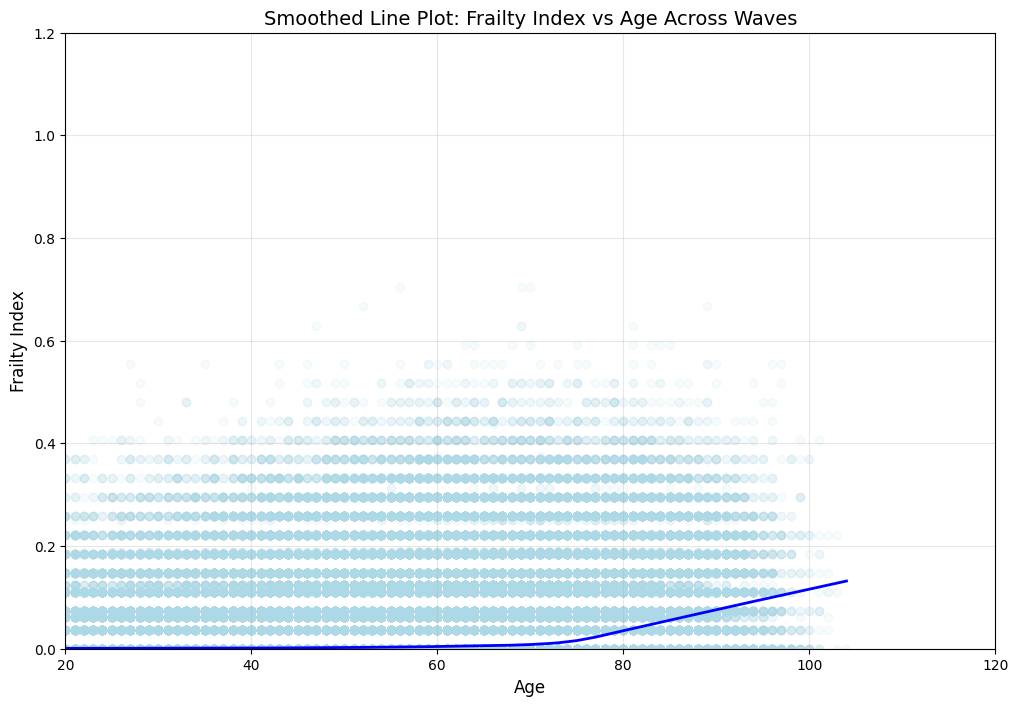

Plot displayed

Summary Statistics:
count    500346.000000
mean          0.029962
std           0.060718
min           0.000000
25%           0.000000
50%           0.000000
75%           0.037037
max           0.703704
Name: frailty, dtype: float64

Number of observations used in the plot: 500346

Number of observations with frailty score 1: 0

Age range:
count    500346.000000
mean         50.168288
std          17.500804
min          20.000000
25%          36.000000
50%          49.500000
75%          64.000000
max         104.000000
Name: age_dv, dtype: float64


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the data
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_with_frailty_long_panel.csv')

# Filter out NaN frailty scores, and ages below 20 or above 120
df_filtered = df[(df['frailty'] >= 0) & 
                 (df['frailty'].notna()) & 
                 (df['age_dv'] >= 20) & 
                 (df['age_dv'] <= 120)]

# Perform LOWESS smoothing
smoothed = lowess(df_filtered['frailty'], df_filtered['age_dv'], frac=0.15)

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['age_dv'], df_filtered['frailty'], alpha=0.1, color='lightblue')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='blue', linewidth=2)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Frailty Index', fontsize=12)
plt.title('Smoothed Line Plot: Frailty Index vs Age Across Waves', fontsize=14)
plt.grid(True, alpha=0.3)

# Set axis limits
plt.xlim(20, 120)
plt.ylim(0, 1.2)

# Show the plot
plt.show()

print("Plot displayed")

# Print some summary statistics
print("\nSummary Statistics:")
print(df_filtered['frailty'].describe())
print("\nNumber of observations used in the plot:", len(df_filtered))
print("\nNumber of observations with frailty score 1:", (df_filtered['frailty'] == 1).sum())
print("\nAge range:")
print(df_filtered['age_dv'].describe())